<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Generating-synthetic-data" data-toc-modified-id="Generating-synthetic-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generating synthetic data</a></span></li><li><span><a href="#Markowitz-optimization-and-the-Efficient-Frontier" data-toc-modified-id="Markowitz-optimization-and-the-Efficient-Frontier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Markowitz optimization and the Efficient Frontier</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Markowitz Portfolio Optimisation

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
np.random.seed(123)
import cufflinks

# Generating synthetic data
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- We will start by using random data although in reality algo-traders use actual stock data. 
- Assume that we have 4 assets, each with a return series of length 1000. 
- We can use `numpy.random.randn` to sample returns from a normal distribution.
    
</font>
</div>

In [3]:
# NUMBER OF ASSETS
n_assets = 4

# NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

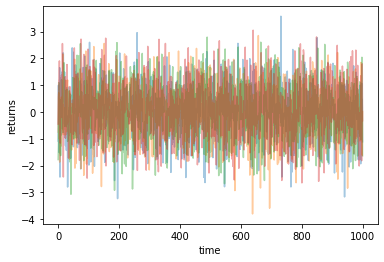

In [4]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
plt.show()

<div class="alert alert-info">
<font color=black>

- These return series can be used to create a wide range of portfolios, which all have different returns and risks (standard deviation). 

- We can produce a wide range of random weight vectors and plot those portfolios. As we want all our capital to be invested, this vector will have to some to one.
    
</font>
</div>

In [17]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

In [18]:
print(rand_weights(n_assets))
print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.00516547 0.04796114 0.44664656 0.50022684]
[0.31204522 0.42245367 0.10956881 0.1559323 ]
[0.30555013 0.08035709 0.28317041 0.33092237]


<div class="alert alert-info">
<font color=black>

- Next, lets evaluate how many of these random portfolios would perform. 
    
- Towards this goal we are calculating the mean returns as well as the volatility (here we are using standard deviation). 
    
- You can also see that there is a filter that only allows to plot portfolios with a standard deviation of < 2 for better illustration.

</font>
</div>

In [6]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))

    # covariance matrix
    C = np.asmatrix(np.cov(returns))

    mu = w * p.T

    # standard deviation
    sigma = np.sqrt(w * C * w.T)

    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

<div class="alert alert-info">
<font color=black>

- This is because the simple standard deviation calculation would not take covariances into account. 

- In the covariance matrix, the values of the diagonal represent the simple variances of each asset while the off-diagonals are the variances between the assets. 
    
- By using ordinary std() we effectively only regard the diagonal and miss the rest. A small but **significant difference**.

</font>
</div>

In [7]:
# Let's now generate 500 portfolios
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec)
    for _ in range(n_portfolios)
])

In [8]:
means

array([[ 2.41232094e-02],
       [ 7.01418660e-03],
       [ 3.21734128e-02],
       [ 1.85010572e-02],
       [ 1.64446869e-02],
       [ 1.59565656e-02],
       [-2.78733850e-03],
       [ 1.99912461e-02],
       [ 2.11430196e-02],
       [ 1.30239197e-02],
       [-6.87545532e-03],
       [ 9.23189889e-03],
       [ 1.05604148e-02],
       [-1.32570103e-03],
       [-1.27539537e-02],
       [ 1.95577749e-02],
       [ 1.16966113e-03],
       [ 3.48758956e-03],
       [ 7.52725534e-03],
       [ 9.60356146e-03],
       [ 2.60619859e-03],
       [ 1.66220136e-02],
       [-2.02409157e-03],
       [ 1.14697751e-02],
       [ 8.82744502e-03],
       [ 1.06121832e-02],
       [-3.08048754e-03],
       [-4.27906625e-03],
       [ 7.76089507e-04],
       [ 1.35858737e-02],
       [ 1.08510929e-02],
       [ 3.06969321e-02],
       [ 1.99947708e-02],
       [ 6.75782987e-03],
       [ 1.13481413e-02],
       [ 2.91416259e-02],
       [ 3.31937990e-03],
       [ 1.06061613e-02],
       [ 6.2

<div class="alert alert-info">
<font color=black>

- Upon plotting those you will observe that they form a characteristic parabolic shape called the **Markowitz bullet** with the boundaries being called the ‘efficient frontier‘, where we have the lowest variance for a given expected.

</font>
</div>

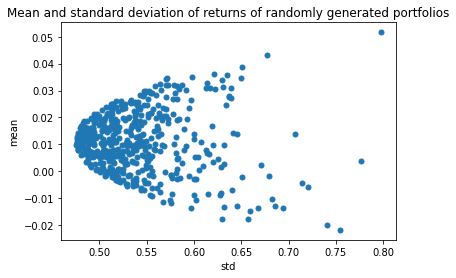

In [9]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
plt.show()
#py.iplot_mpl(fig, filename='mean_std', strip_style=True)

# Markowitz optimization and the Efficient Frontier
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Once we have a good representation of our portfolios as the blue dots show we can calculate the efficient frontier Markowitz-style. This is done by minimising: $w^TCw$ for $w$ on the expected portfolio return $R^T w$ whilst keeping the sum of all the weights equal to 1.
    
- Here we parametrically run through $R^T w = \mu$ and find the minimum variance for different $\mu$‘s. 
  
- This can be done with `scipy.optimise.minimize` but we have to define quite a complex problem with bounds, constraints and a Lagrange multiplier. Conveniently, the `cvxopt` package, a convex solver, does all of that for us. 

</font>
</div>

In [10]:
# Turn off progress printing
solvers.options['show_progress'] = False

In [11]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]

    # CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]

    # CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])

    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [15]:
weights, returns, risks = optimal_portfolio(return_vec)
weights

array([[2.77880107e-09],
       [3.20322848e-06],
       [1.54301198e-06],
       [9.99995251e-01]])

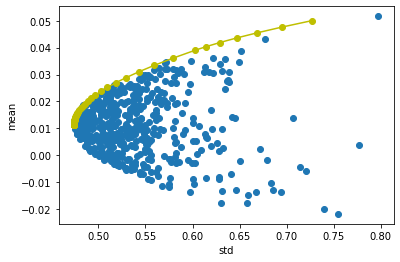

In [16]:
fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')
plt.show()

#py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [13]:
print(weights)

[[2.77880107e-09]
 [3.20322848e-06]
 [1.54301198e-06]
 [9.99995251e-01]]


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/
- http://cvxopt.org/examples/

</font>
</div>